In [1]:
# -------------------------------------------------------------------------------
# import packages
import import_ipynb
import statistics

# -------------------------------------------------------------------------------
# import scripts
from data_processing import hiring_data
import functions.algorithmic_model as am
import functions.simulation_vis as sm_vis

<string>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
<string>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [2]:
# data to X and y
X = hiring_data.drop(columns=['decision', 'Id'])
y = hiring_data['decision']

beta = [0, 0.3, 0.8]

# Logistic Model - No Group Fairness

In [3]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_1 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_lm_1, gender_shares2 = am.logistic_regression(X,y, "logistic", discrimination, enforce_fairness=False)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_1.append(all_selected_lm_1)

------------------------------
Mean: 0.34058774641062745
Mean: 0.31272
------------------------------
Mean: 0.34058774641062745
Mean: 0.41272
------------------------------
Mean: 0.34058774641062745
Mean: 0.5372


# Random Forest Model - No Group Fairness

In [4]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_1 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_rf_1, gender_shares2 = am.random_forest_model(X,y, "random_forest", discrimination, enforce_fairness=False)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_rf_1.append(all_selected_rf_1)

------------------------------
Mean: 0.2548655035545044
Mean: 0.22336
------------------------------
Mean: 0.2548655035545044
Mean: 0.34016
------------------------------
Mean: 0.2548655035545044
Mean: 0.47704


# Logistic Model - Statistical Parity

In [5]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_2 = []

for discrimination in beta: 
    X_train, y_train, model, gender_shares1, all_selected_lm_2, gender_shares2  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_2.append(all_selected_lm_2)

------------------------------
Mean: 0.022903607566336692
Mean: -0.008159999999999999
------------------------------
Mean: 0.027160980051764583
Mean: 0.12168
------------------------------
Mean: 0.022887054029705974
Mean: 0.28008


# Random Forest Model - Statistical Parity

In [6]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_2 = []

for discrimination in beta: 
    X_train, y_train, model, gender_shares1, all_selected_rf_2, gender_shares2  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_2.append(all_selected_rf_2)

------------------------------
Mean: 0.005696047339572535
Mean: -0.02384
------------------------------
Mean: 0.004469718214431895
Mean: 0.10584
------------------------------
Mean: 0.004523172036380661
Mean: 0.26096


# Logistic Model - Equalized Odds

In [7]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_3 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_lm_3, gender_shares2  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_lm_3.append(all_selected_lm_3)

------------------------------
Mean: 0.06872759957349267
Mean: 0.03656
------------------------------
Mean: 0.07163737206484393
Mean: 0.16088
------------------------------
Mean: 0.06848017996210237
Mean: 0.31696


# Random Forest Model - Equalized Odds

In [8]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_3 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_rf_3, gender_shares2  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_3.append(all_selected_rf_3)

------------------------------
Mean: 0.2696191928113917
Mean: 0.24544
------------------------------
Mean: 0.2700296594373413
Mean: 0.35416
------------------------------
Mean: 0.2699193212792422
Mean: 0.4836


# Logistic Model - Equal Opportunity

In [9]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_4 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_lm_4, gender_shares2  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_4.append(all_selected_lm_4)

------------------------------
Mean: 0.08034684350953825
Mean: 0.05936
------------------------------
Mean: 0.07750662947692724
Mean: 0.16224
------------------------------
Mean: 0.07885643923924897
Mean: 0.33464


# Random Forest Model - Equal Opportunity

In [10]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_4 = []

for discrimination in beta:
    X_train, y_train, model, gender_shares1, all_selected_rf_4, gender_shares2  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_4.append(all_selected_rf_4)

------------------------------
Mean: 0.22599158814776873
Mean: 0.19136
------------------------------
Mean: 0.22449354863753182
Mean: 0.31776
------------------------------
Mean: 0.22661865707723866
Mean: 0.45784


# Simulation Evaluation

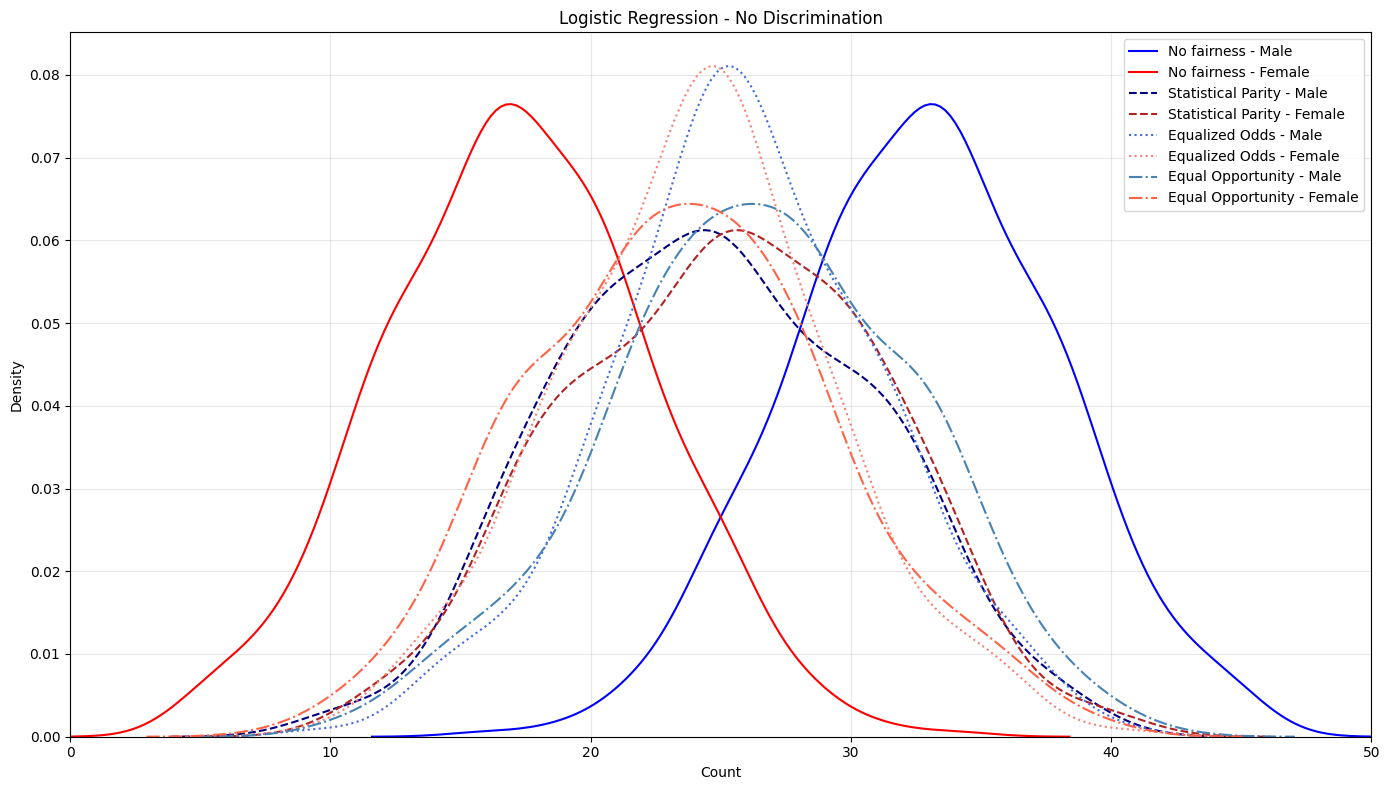

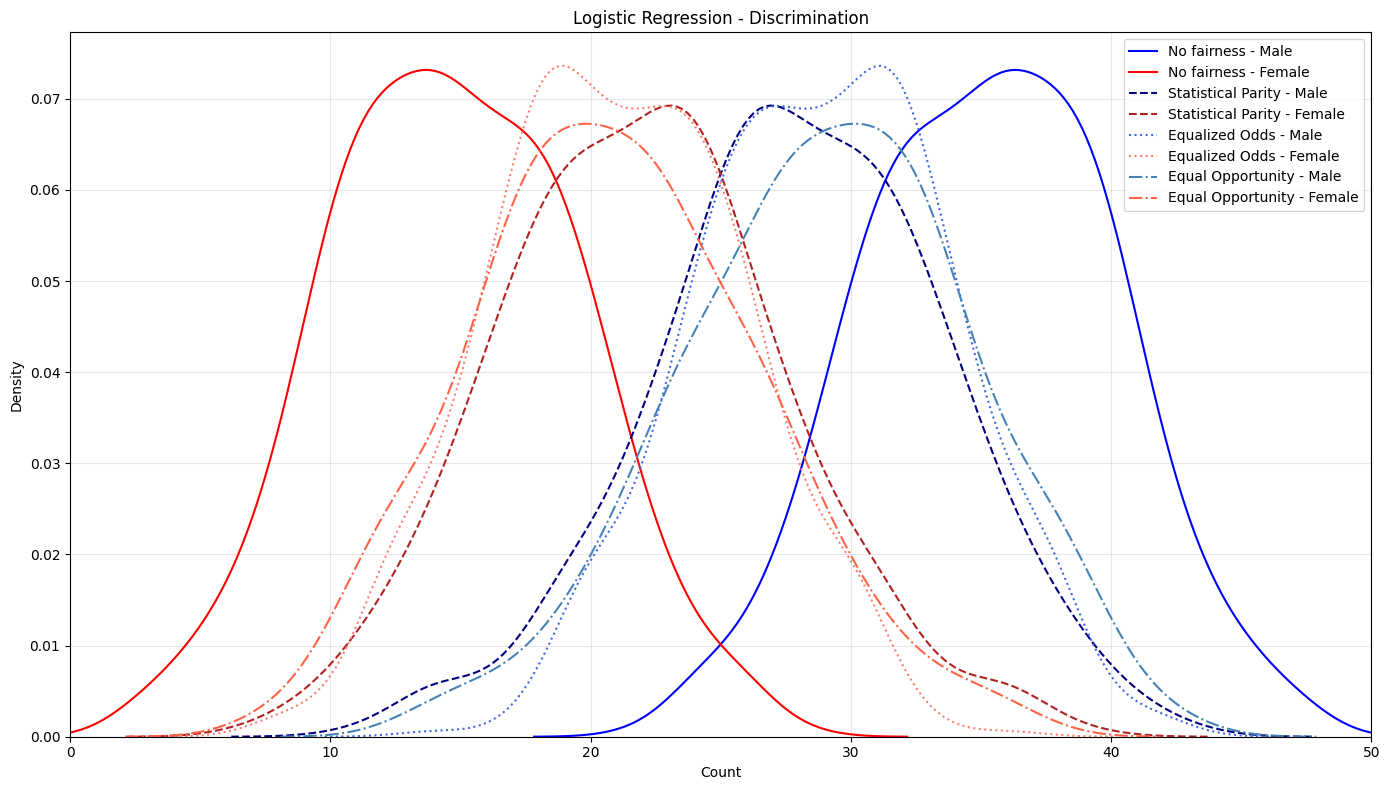

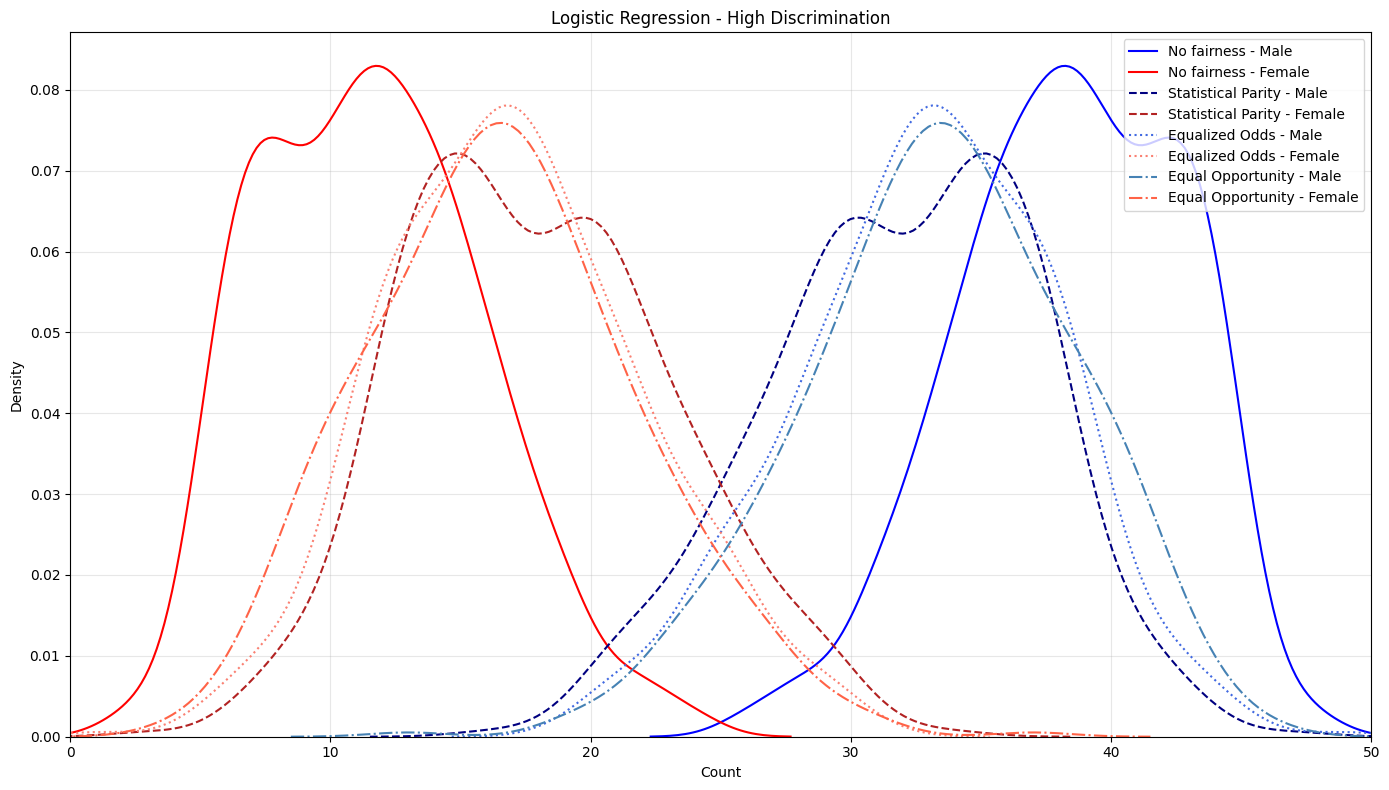

In [11]:
# Ignore specific FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

titles = [
    "Logistic Regression - No Discrimination",
    "Logistic Regression - Discrimination",
    "Logistic Regression - High Discrimination"
]

for (res1, res2, res3, res4), title in zip(zip(results_lm_1, results_lm_2, results_lm_3, results_lm_4), titles):
    fig = sm_vis.plot_multiple_gender_distribution_kde(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title
    )

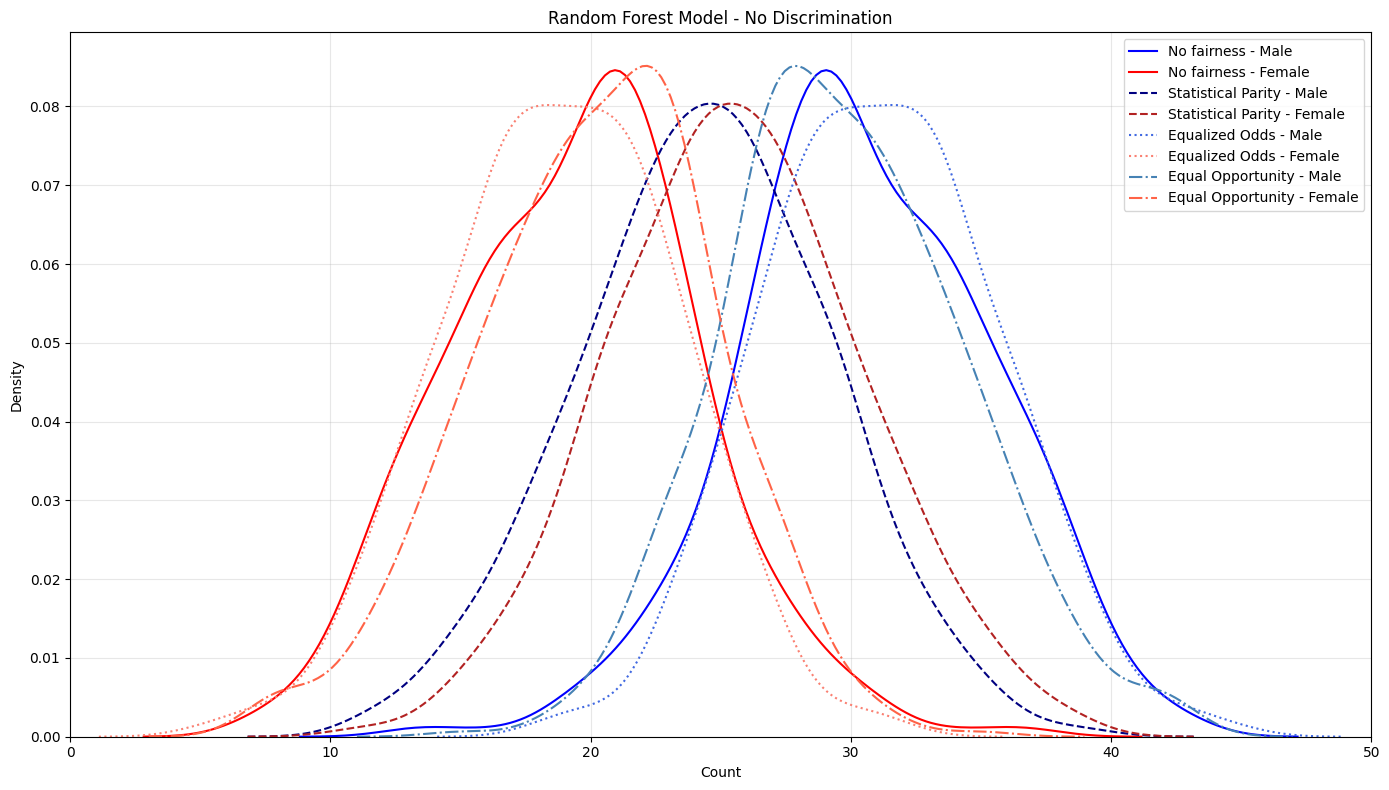

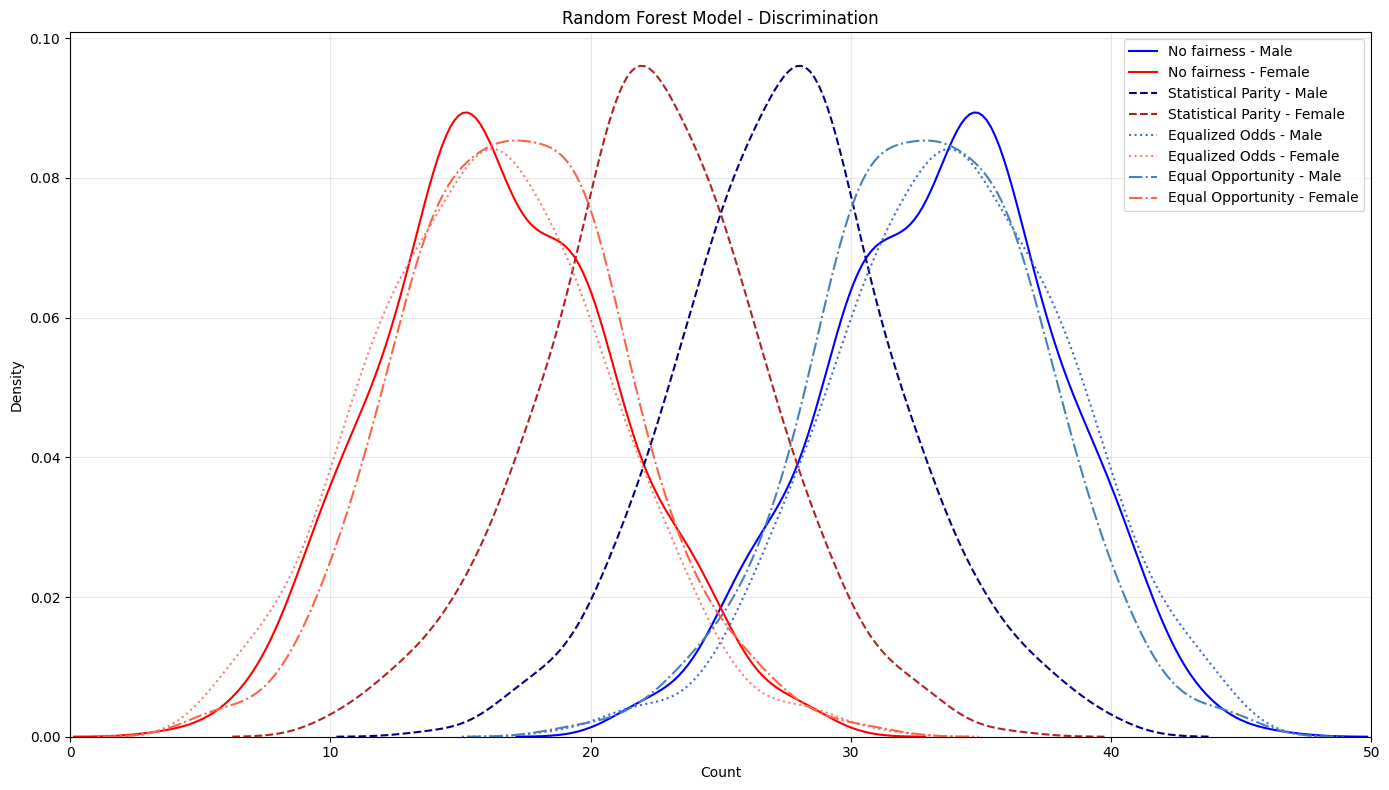

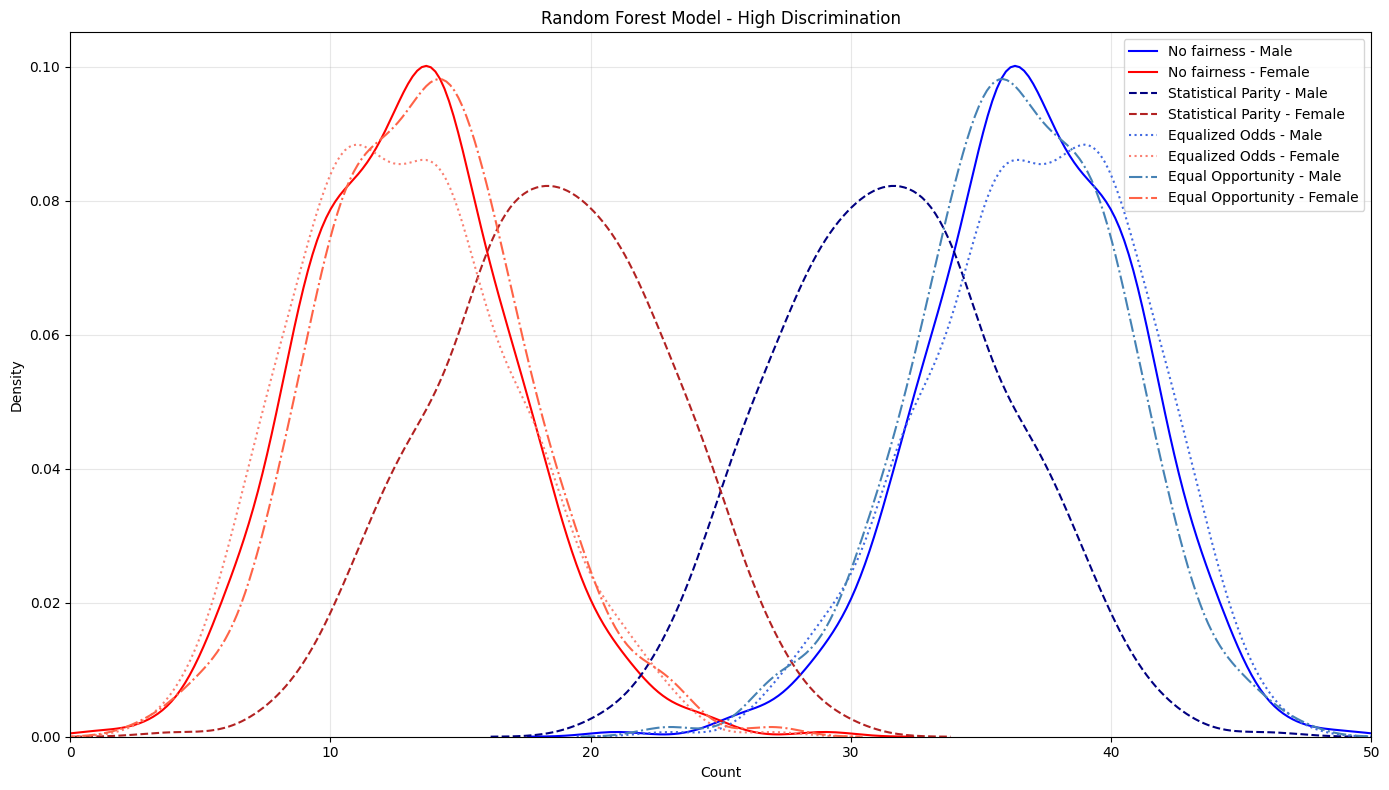

In [12]:
# Ignore specific FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

titles = [
    "Random Forest Model - No Discrimination",
    "Random Forest Model - Discrimination",
    "Random Forest Model - High Discrimination"
]

for (res1, res2, res3, res4), title in zip(zip(results_rf_1, results_rf_2, results_rf_3, results_rf_4), titles):
    fig = sm_vis.plot_multiple_gender_distribution_kde(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title
    )